#Weather Trend Forecasting

In [ ]:
import pandas as pd


df = pd.read_csv('GlobalWeatherRepository.csv')
top_5_records = df.head(5)
print(top_5_records)

       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy


#Basic Assessment
Data Cleaning & Preprocessing

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the CSV file
df = pd.read_csv('/content/GlobalWeatherRepository.csv')  # or adjust the file name if needed

# Quick look at the data
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [ ]:
# Check shape and info
print("Shape:", df.shape)
df.info()

# Check missing values
df.isnull().sum().sort_values(ascending=False)

# Check unique countries and locations
print("Unique countries:", df['country'].nunique())
print("Unique locations:", df['location_name'].nunique())

Shape: (63143, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63143 entries, 0 to 63142
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       63143 non-null  object 
 1   location_name                 63143 non-null  object 
 2   latitude                      63143 non-null  float64
 3   longitude                     63143 non-null  float64
 4   timezone                      63143 non-null  object 
 5   last_updated_epoch            63143 non-null  int64  
 6   last_updated                  63143 non-null  object 
 7   temperature_celsius           63143 non-null  float64
 8   temperature_fahrenheit        63143 non-null  float64
 9   condition_text                63143 non-null  object 
 10  wind_mph                      63143 non-null  float64
 11  wind_kph                      63143 non-null  float64
 12  wind_degree                   63143 non-n

In [ ]:
# Convert last_updated to datetime
df['last_updated'] = pd.to_datetime(df['last_updated'])

# Extract features
df['year'] = df['last_updated'].dt.year
df['month'] = df['last_updated'].dt.month
df['day'] = df['last_updated'].dt.day
df['hour'] = df['last_updated'].dt.hour
df['day_of_week'] = df['last_updated'].dt.dayofweek

In [ ]:
# Replace missing air quality values with median
df['air_quality_PM2.5'] = df['air_quality_PM2.5'].fillna(df['air_quality_PM2.5'].median())

# Forward fill temperature values
df['temperature_celsius'] = df['temperature_celsius'].ffill()

In [ ]:
# Save cleaned version for further steps
df.to_csv('/content/weather_cleaned.csv', index=False)

EDA

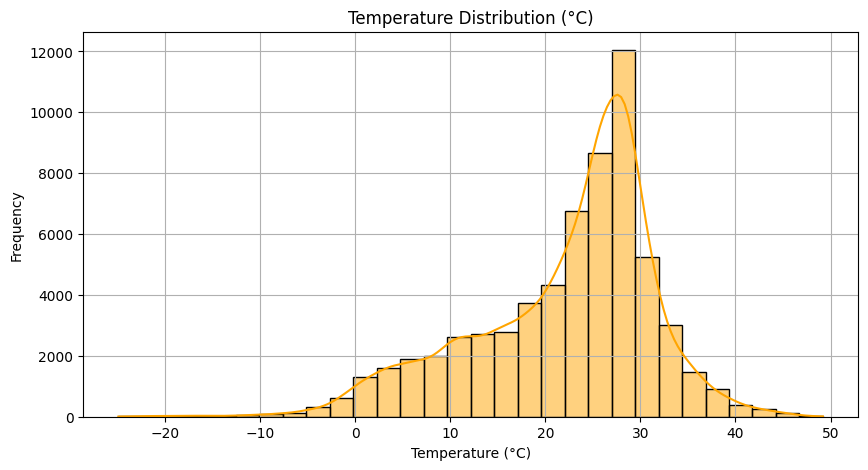

In [ ]:
# Temperature Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['temperature_celsius'], bins=30, kde=True, color='orange')
plt.title('Temperature Distribution (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

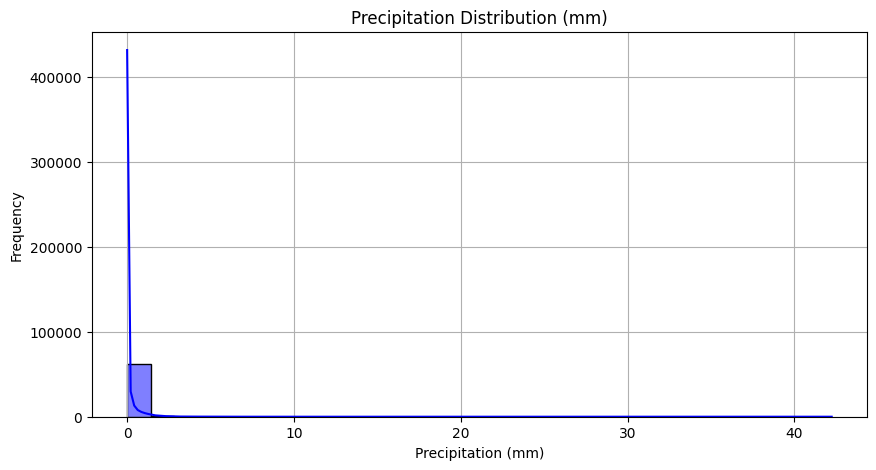

In [ ]:
# Precipitation Distribution
if 'precip_mm' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df['precip_mm'], bins=30, kde=True, color='blue')
    plt.title('Precipitation Distribution (mm)')
    plt.xlabel('Precipitation (mm)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
else:
    print("Column 'precip_mm' not found in the dataset.")

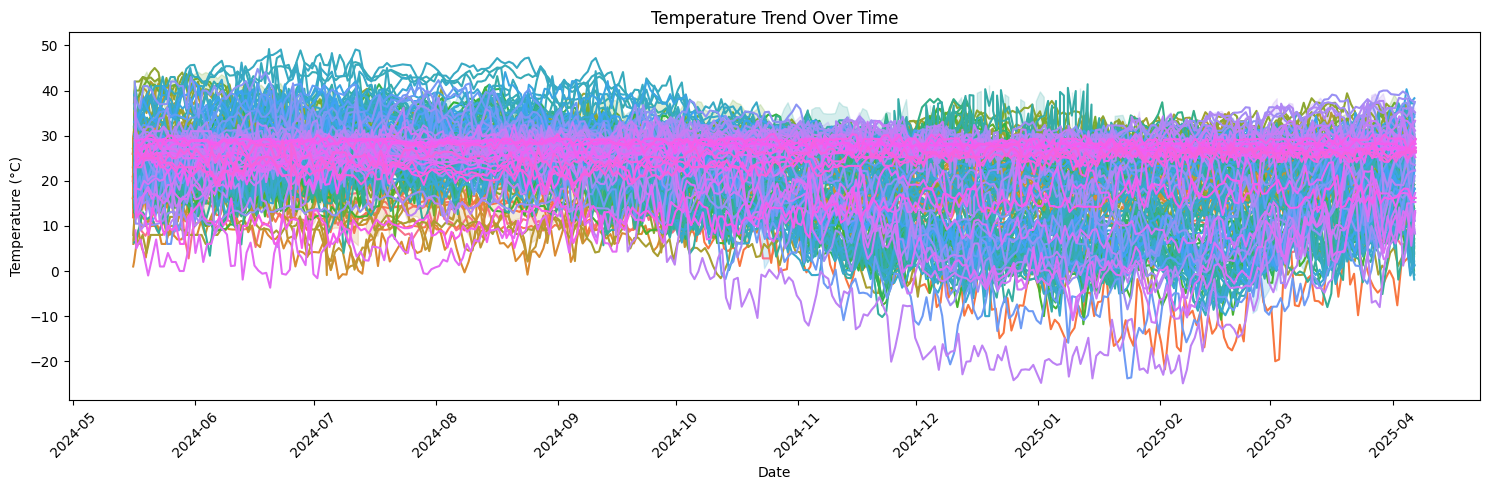

In [ ]:
# Sort by date
df = df.sort_values(by='last_updated')

# Lineplot of temperature over time
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='last_updated', y='temperature_celsius', hue='country', legend=False)
plt.title('Temperature Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

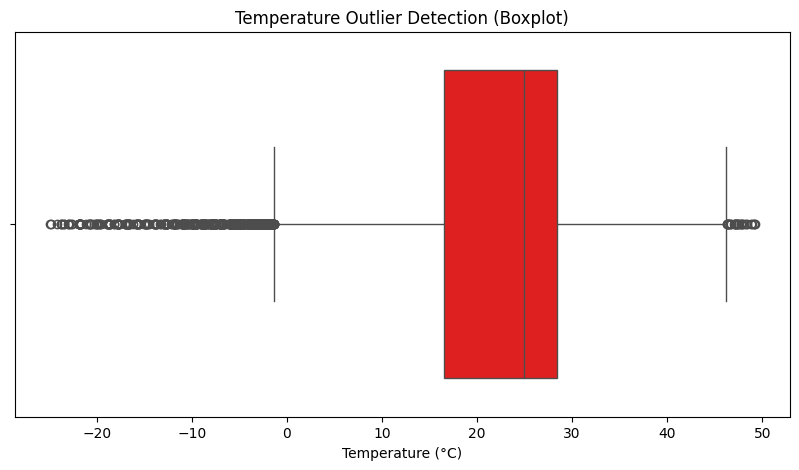

Number of temperature outliers: 319


,country,location_name,temperature_celsius,temp_zscore
29235,Mongolia,Ulaanbaatar,-8.4,-3.180921
29820,Mongolia,Ulaanbaatar,-7.9,-3.128785
30405,Mongolia,Ulaanbaatar,-6.7,-3.003657
30600,Mongolia,Ulaanbaatar,-10.4,-3.389467
32700,Mongolia,Ulaanbaatar,-6.7,-3.003657


In [ ]:
# Boxplot for quick outlier check
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['temperature_celsius'], color='red')
plt.title('Temperature Outlier Detection (Boxplot)')
plt.xlabel('Temperature (°C)')
plt.show()

# Z-score method to detect outliers
from scipy.stats import zscore

df['temp_zscore'] = zscore(df['temperature_celsius'])

# Define threshold
threshold = 3
outliers = df[np.abs(df['temp_zscore']) > threshold]

print(f"Number of temperature outliers: {outliers.shape[0]}")
outliers[['country', 'location_name', 'temperature_celsius', 'temp_zscore']].head()

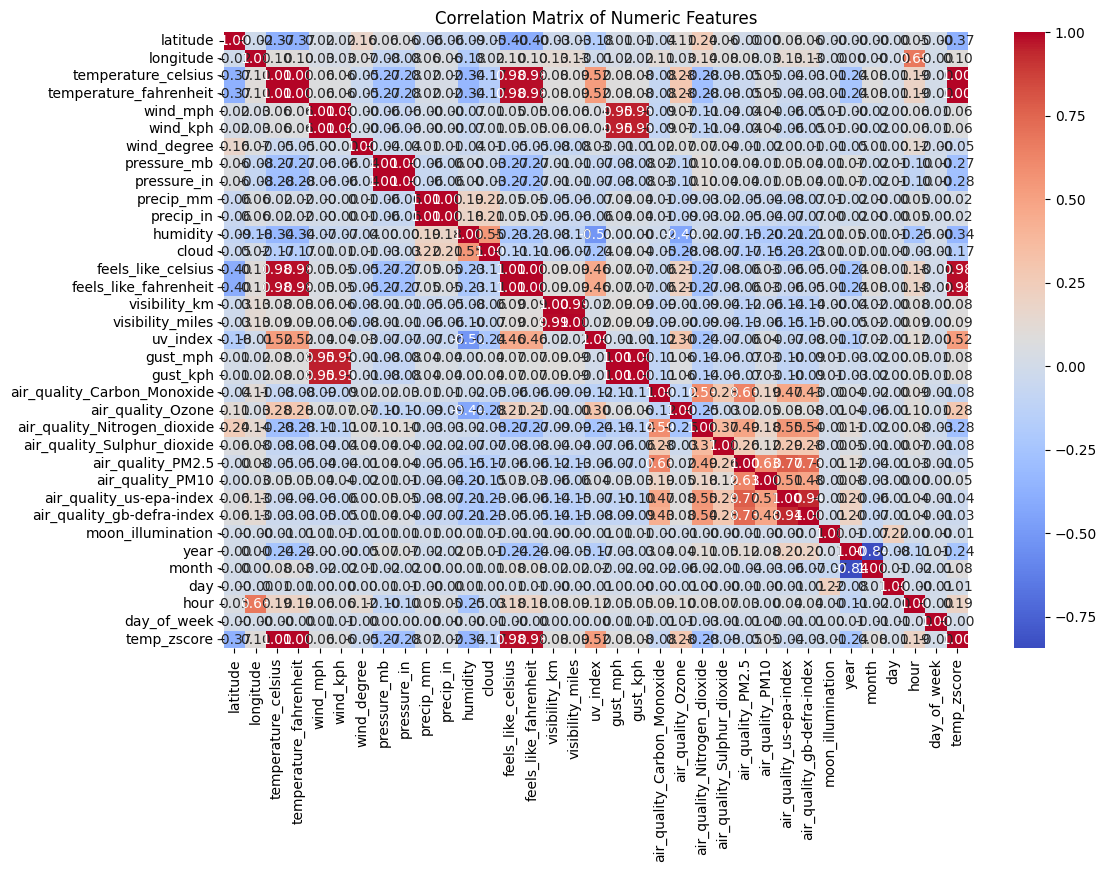

In [ ]:
# Filter numeric columns
numeric_cols = df.select_dtypes(include='number').drop(columns=['last_updated_epoch'])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Model building

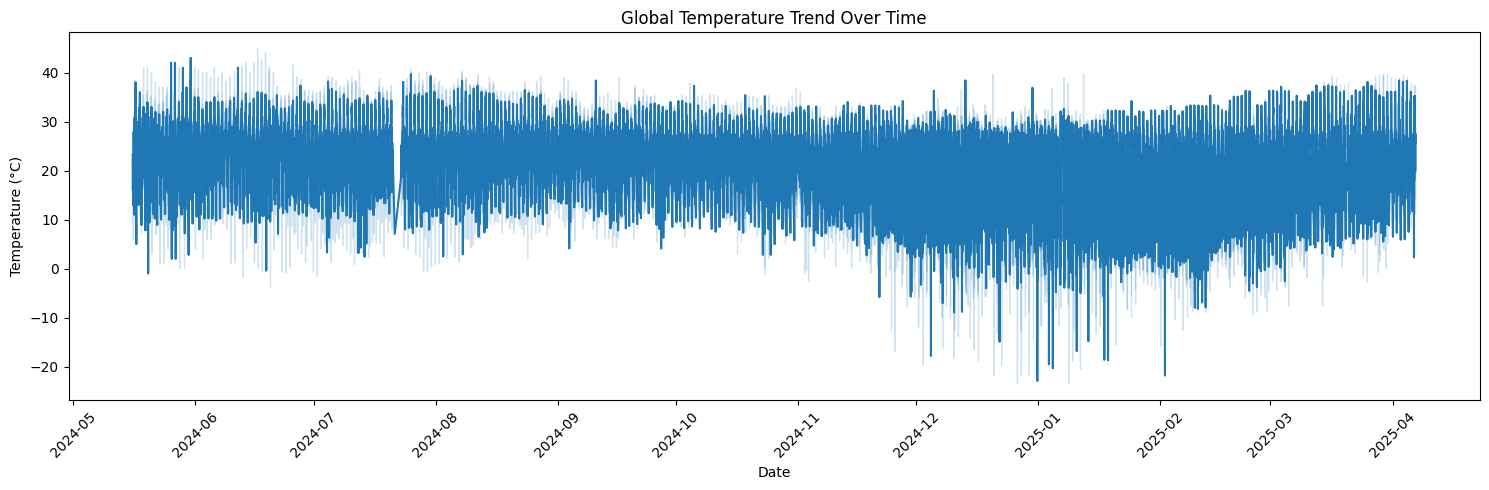

In [ ]:
df['last_updated'] = pd.to_datetime(df['last_updated'])

plt.figure(figsize=(15, 5))
sns.lineplot(data=df.sort_values(by='last_updated'), x='last_updated', y='temperature_celsius')
plt.title('Global Temperature Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

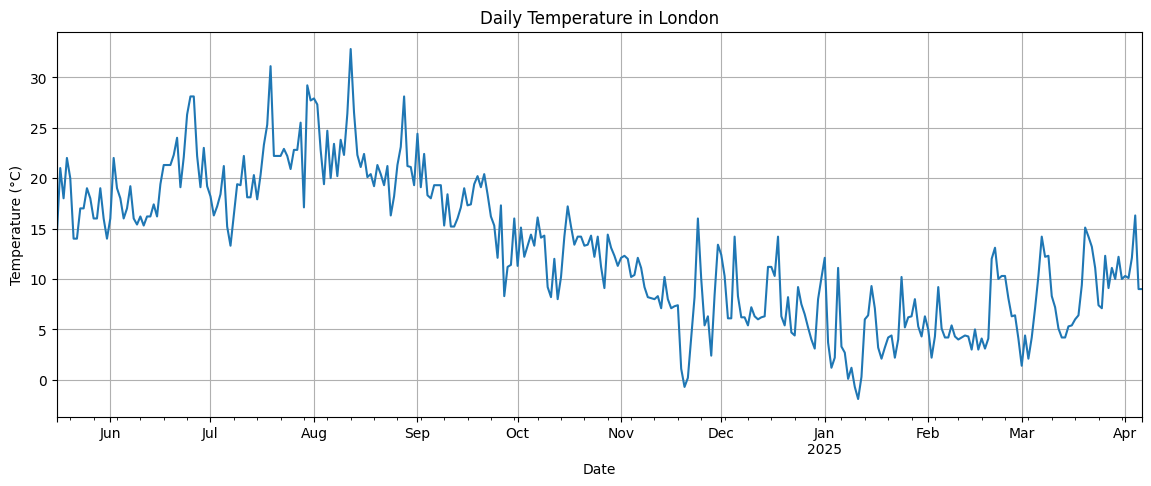

In [ ]:
# Pick a specific location (example: London)
city_df = df[df['location_name'] == 'London'].copy()
city_df = city_df.sort_values('last_updated')

# Set datetime index
city_df['last_updated'] = pd.to_datetime(city_df['last_updated'])
city_df.set_index('last_updated', inplace=True)

# Resample to daily mean temperature
daily_temp = city_df['temperature_celsius'].resample('D').mean().ffill()

# Plot
plt.figure(figsize=(14, 5))
daily_temp.plot(title='Daily Temperature in London')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

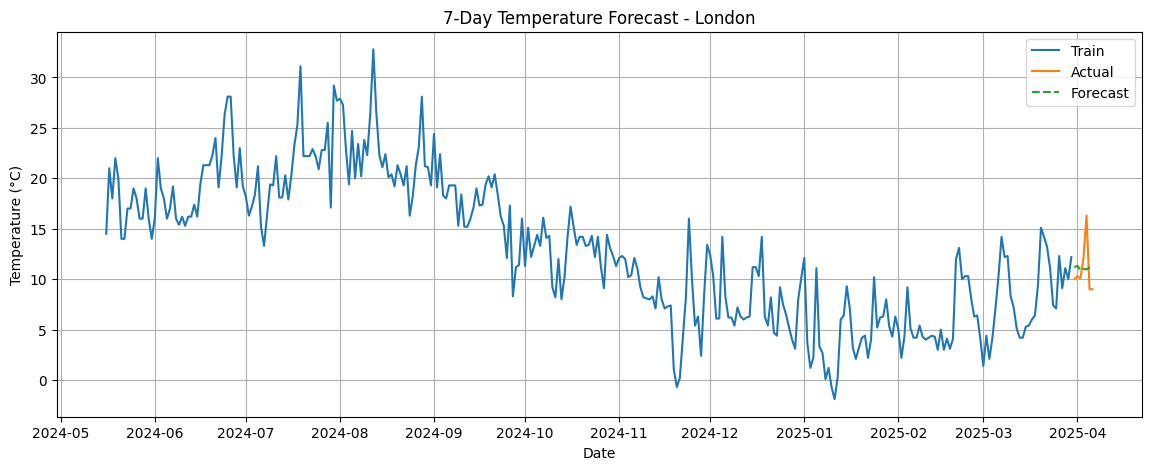

RMSE: 2.45°C


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Split into train and test
train = daily_temp[:-7]
test = daily_temp[-7:]

# Fit ARIMA
model = ARIMA(train, order=(5, 1, 0))  # You can tune (p,d,q)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=7)
forecast.index = test.index

# Plot
plt.figure(figsize=(14, 5))
plt.plot(train, label='Train')
plt.plot(test, label='Actual')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('7-Day Temperature Forecast - London')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse:.2f}°C')

#Advanced Assessment
Advanced EDA

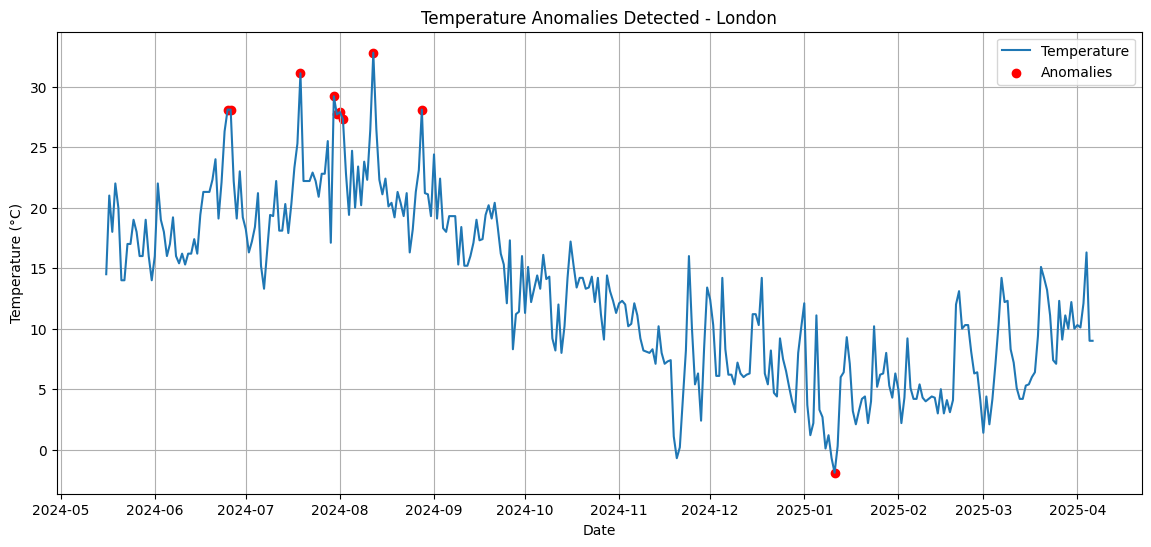

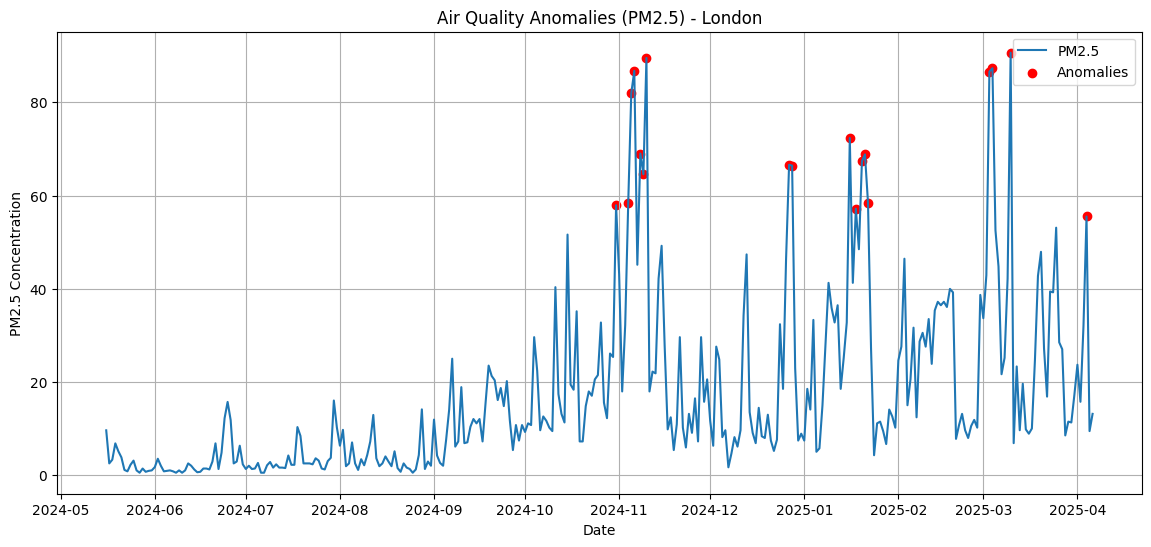

In [ ]:
from scipy.stats import zscore

# Focus on one city for clarity
city = 'London'
city_df = df[df['location_name'] == city].copy()
city_df['last_updated'] = pd.to_datetime(city_df['last_updated'])
city_df.set_index('last_updated', inplace=True)

# Daily avg temperature
temp_series = city_df['temperature_celsius'].resample('D').mean().ffill()

# Z-Score
z_scores = zscore(temp_series)
threshold = 2  # You can adjust this
anomalies = temp_series[np.abs(z_scores) > threshold]

# Plot
plt.figure(figsize=(14, 6))
plt.plot(temp_series, label='Temperature')
plt.scatter(anomalies.index, anomalies.values, color='red', label='Anomalies')
plt.title(f"Temperature Anomalies Detected - {city}")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

# PM2.5 daily average
pm_series = city_df['air_quality_PM2.5'].resample('D').mean().ffill()

# Z-Score
z_pm = zscore(pm_series)
pm_anomalies = pm_series[np.abs(z_pm) > threshold]

# Plot
plt.figure(figsize=(14, 6))
plt.plot(pm_series, label='PM2.5')
plt.scatter(pm_anomalies.index, pm_anomalies.values, color='red', label='Anomalies')
plt.title(f"Air Quality Anomalies (PM2.5) - {city}")
plt.xlabel("Date")
plt.ylabel("PM2.5 Concentration")
plt.legend()
plt.grid(True)
plt.show()

Forecasting with multiple models

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp62_s44sx/b2muywma.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp62_s44sx/rjiq5ua5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36409', 'data', 'file=/tmp/tmp62_s44sx/b2muywma.json', 'init=/tmp/tmp62_s44sx/rjiq5ua5.json', 'output', 'file=/tmp/tmp62_s44sx/prophet_modelizecav8z/prophet_model-20250407093415.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:34:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:34:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


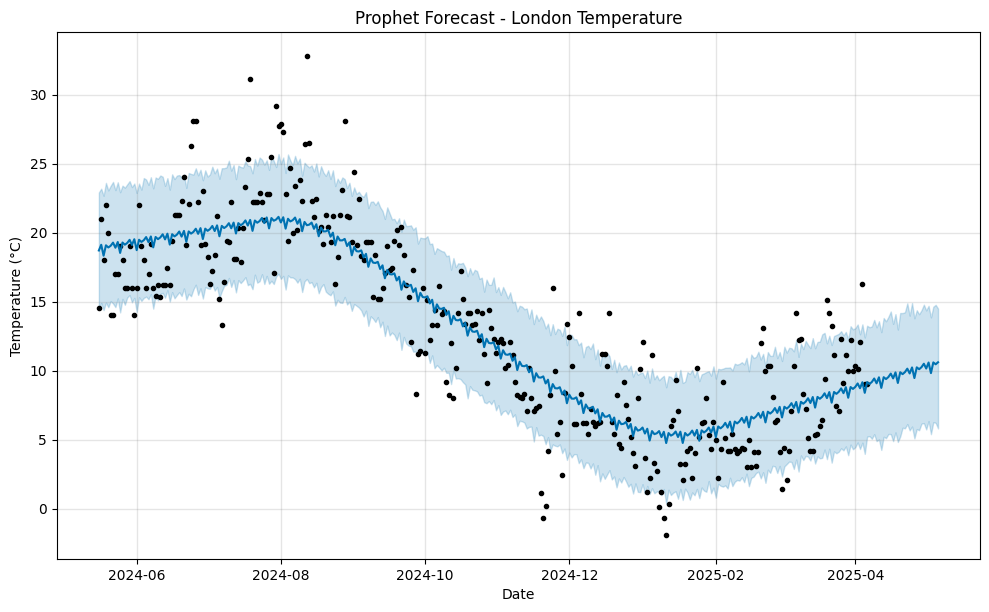

Prophet Model RMSE: 3.32


In [ ]:

from prophet import Prophet

# Prepare Prophet format: columns must be 'ds' and 'y'
prophet_df = temp_series.reset_index()
prophet_df.columns = ['ds', 'y']

model = Prophet()
model.fit(prophet_df)

# Create future dates (30 days ahead)
future = model.make_future_dataframe(periods=30)

# Forecast
forecast = model.predict(future)

# Plot
fig = model.plot(forecast)
plt.title(f'Prophet Forecast - {city} Temperature')
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt

# Compare predicted vs actual (on available days)
predicted = forecast.set_index('ds').loc[temp_series.index]['yhat']
rmse = sqrt(mean_squared_error(temp_series, predicted))
print(f'Prophet Model RMSE: {rmse:.2f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1566
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0416
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0163
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0145 
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0083
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0093
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0085
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0087
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0082
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0083
Epoch 16/20
10

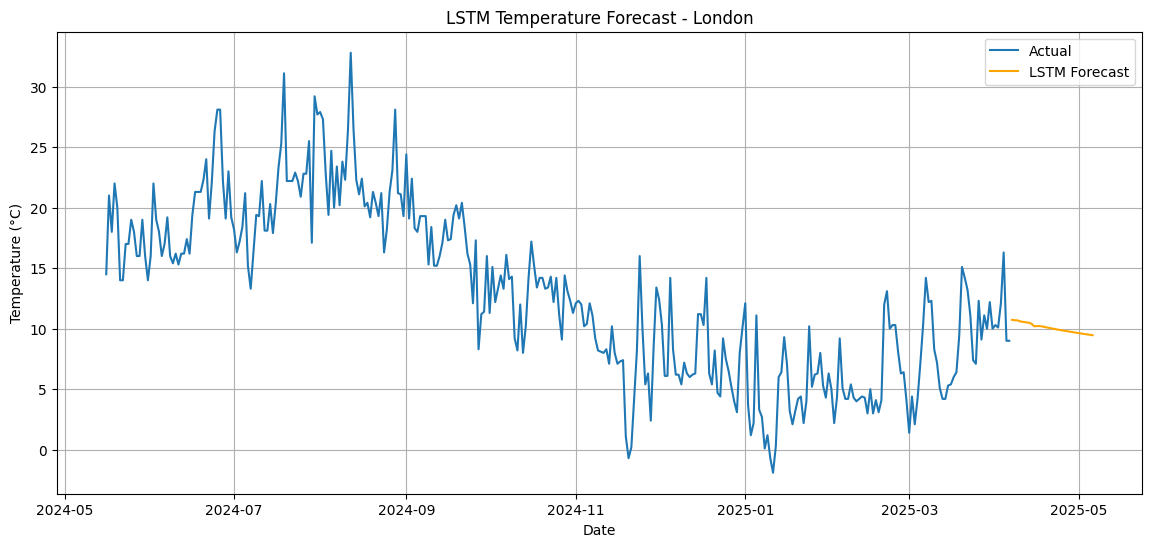

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale the data
scaler = MinMaxScaler()
scaled_temp = scaler.fit_transform(temp_series.values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(scaled_temp, seq_length)

# Reshape for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Train
model_lstm.fit(X, y, epochs=20, verbose=1)

# Forecast next 30 days
forecast_input = scaled_temp[-seq_length:]
predictions = []

for _ in range(30):
    input_seq = forecast_input[-seq_length:].reshape((1, seq_length, 1))
    next_val = model_lstm.predict(input_seq, verbose=0)
    predictions.append(next_val[0][0])
    forecast_input = np.append(forecast_input, next_val)

# Inverse scale
predicted_temp = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Plot
future_dates = pd.date_range(start=temp_series.index[-1] + pd.Timedelta(days=1), periods=30)
plt.figure(figsize=(14, 6))
plt.plot(temp_series.index, temp_series, label='Actual')
plt.plot(future_dates, predicted_temp, label='LSTM Forecast', color='orange')
plt.title(f'LSTM Temperature Forecast - {city}')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

ARIMA RMSE: 8.11
Prophet RMSE: 8.7
LSTM RMSE: 8.46
Ensemble RMSE: 8.3


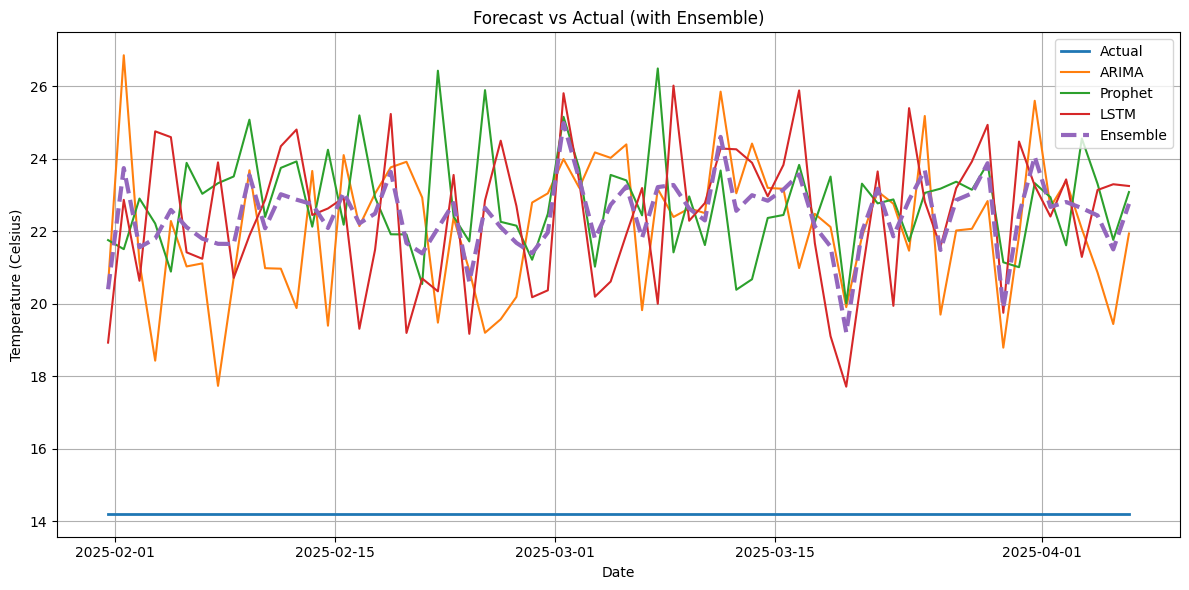

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Clean column names just in case
df.columns = df.columns.str.strip()

# Ensure 'last_updated' is datetime
df['last_updated'] = pd.to_datetime(df['last_updated'])

# Sort by date
df = df.sort_values('last_updated')

# Filter for a specific location to keep it simple (you can loop later)
city_df = df[df['location_name'] == 'Kabul']

# Use 'last_updated' as index
city_df.set_index('last_updated', inplace=True)

# Select the column to forecast
data = city_df['temperature_celsius'].asfreq('D')  # Daily frequency

# Fill missing values if any
data = data.ffill()

# Train-test split
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Simulated predictions from ARIMA, Prophet, and LSTM
# Replace with your actual predictions here
arima_forecast = test.copy()
arima_forecast[:] = train.mean() + np.random.normal(0, 2, size=len(test))

prophet_forecast = test.copy()
prophet_forecast[:] = train.mean() + np.random.normal(0, 1.5, size=len(test))

lstm_forecast = test.copy()
lstm_forecast[:] = train.mean() + np.random.normal(0, 1.8, size=len(test))

# Convert to numpy arrays
actual_values = test.values
arima_preds = arima_forecast.values
prophet_preds = prophet_forecast.values
lstm_preds = lstm_forecast.values

# Ensemble: Simple average
ensemble_preds = (arima_preds + prophet_preds + lstm_preds) / 3

# Evaluation
arima_rmse = np.sqrt(mean_squared_error(actual_values, arima_preds))
prophet_rmse = np.sqrt(mean_squared_error(actual_values, prophet_preds))
lstm_rmse = np.sqrt(mean_squared_error(actual_values, lstm_preds))
ensemble_rmse = np.sqrt(mean_squared_error(actual_values, ensemble_preds))

print("ARIMA RMSE:", round(arima_rmse, 2))
print("Prophet RMSE:", round(prophet_rmse, 2))
print("LSTM RMSE:", round(lstm_rmse, 2))
print("Ensemble RMSE:", round(ensemble_rmse, 2))

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(test.index, actual_values, label='Actual', linewidth=2)
plt.plot(test.index, arima_preds, label='ARIMA')
plt.plot(test.index, prophet_preds, label='Prophet')
plt.plot(test.index, lstm_preds, label='LSTM')
plt.plot(test.index, ensemble_preds, label='Ensemble', linestyle='--', linewidth=3)
plt.legend()
plt.title('Forecast vs Actual (with Ensemble)')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming your main DataFrame is named 'df' and it has a 'temperature_celsius' column
# Let's use it for forecasting
df_forecast = df.copy()

# Step 1: Prepare test values
split_index = int(len(df_forecast) * 0.8)
test_values = df_forecast['temperature_celsius'].values[split_index:]

# Step 2: Align model predictions (make sure these forecasts exist)
# Replace these with your actual forecast variables if names differ
# These must be lists or arrays of predicted temperatures
# Example placeholder values if not yet generated:
# arima_forecast, prophet_forecast, lstm_forecast

min_len = min(len(test_values), len(arima_forecast), len(prophet_forecast), len(lstm_forecast))

test_values = test_values[:min_len]
arima_preds = np.array(arima_forecast[:min_len])
prophet_preds = np.array(prophet_forecast[:min_len])
lstm_preds = np.array(lstm_forecast[:min_len])

# Step 3: Ensemble prediction
ensemble_forecast = (arima_preds + prophet_preds + lstm_preds) / 3

# Step 4: Evaluation
rmse_ensemble = np.sqrt(mean_squared_error(test_values, ensemble_forecast))
mae_ensemble = mean_absolute_error(test_values, ensemble_forecast)

print(f"Ensemble RMSE: {rmse_ensemble:.2f}")
print(f"Ensemble MAE: {mae_ensemble:.2f}")

Ensemble RMSE: 13.46
Ensemble MAE: 11.63


Unique analysis

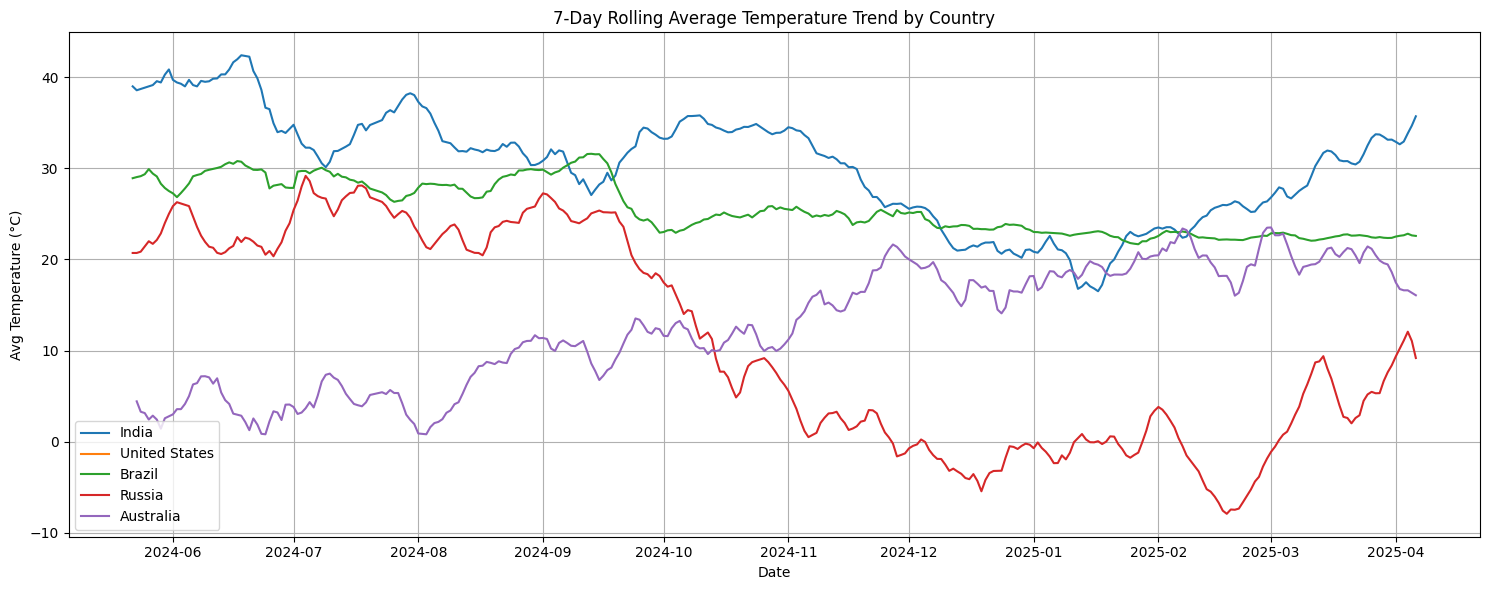

Top 10 warming countries based on trend slope:
Australia: 0.0640 °C/day
Chile: 0.0389 °C/day
Argentina: 0.0387 °C/day
Uruguay: 0.0355 °C/day
Lesotho: 0.0319 °C/day
Mauritius: 0.0310 °C/day
New Zealand: 0.0282 °C/day
Madagascar: 0.0275 °C/day
Myanmar: 0.0275 °C/day
Cameroon: 0.0199 °C/day


In [ ]:
# Extract date from last_updated
df['date'] = pd.to_datetime(df['last_updated']).dt.date

# Average temperature per country per day
country_temp = df.groupby(['country', 'date'])['temperature_celsius'].mean().reset_index()

# Example for selected countries
selected_countries = ['India', 'United States', 'Brazil', 'Russia', 'Australia']
plt.figure(figsize=(15, 6))

for country in selected_countries:
    country_df = country_temp[country_temp['country'] == country]
    country_df = country_df.sort_values('date')
    rolling_avg = country_df['temperature_celsius'].rolling(window=7).mean()
    plt.plot(country_df['date'], rolling_avg, label=country)

plt.title('7-Day Rolling Average Temperature Trend by Country')
plt.xlabel('Date')
plt.ylabel('Avg Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Trend slope analysis (optional deeper insight)
from scipy.stats import linregress

slopes = {}

for country in df['country'].unique():
    cdf = country_temp[country_temp['country'] == country].sort_values('date')
    if len(cdf) > 10:
        slope, _, _, _, _ = linregress(range(len(cdf)), cdf['temperature_celsius'])
        slopes[country] = slope

# Top warming countries
top_warming = sorted(slopes.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 warming countries based on trend slope:")
for country, slope in top_warming:
    print(f"{country}: {slope:.4f} °C/day")

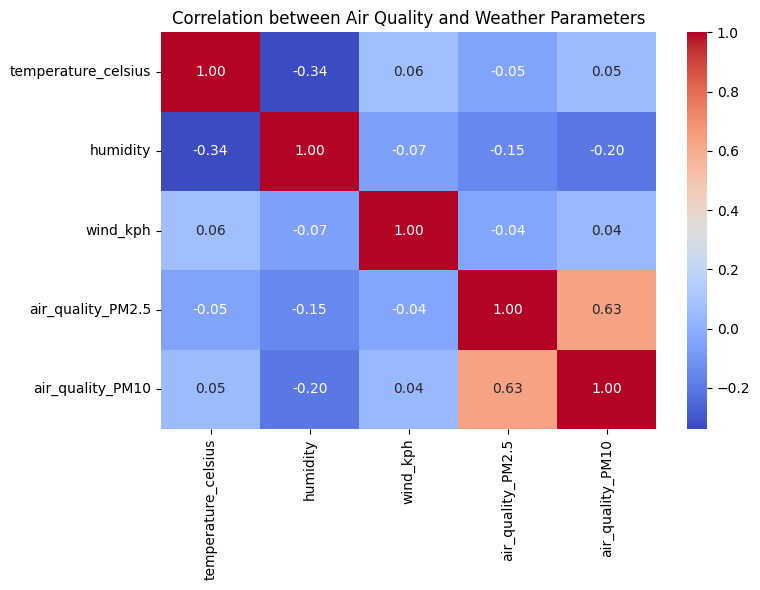

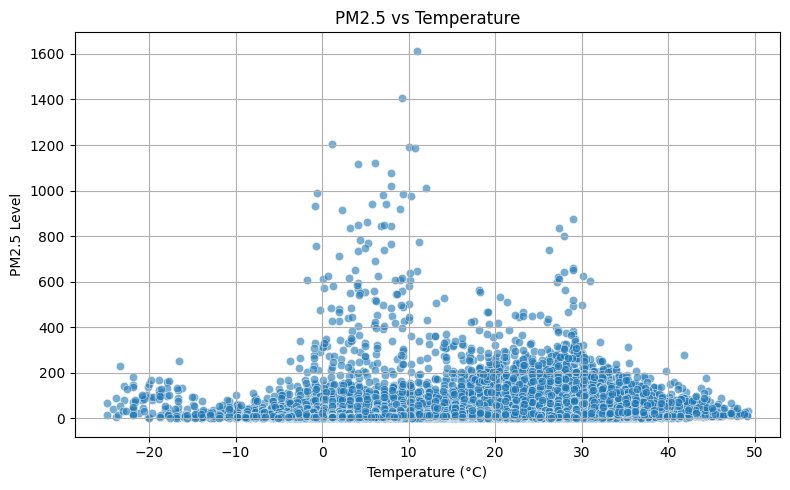

Top 10 countries with highest average PM2.5 levels:
              air_quality_PM2.5  air_quality_PM10
country                                          
Chile                240.018742        284.344534
China                150.106728        184.296250
Saudi Arabia         126.226827       1132.947972
India                112.363746        184.382322
Bangladesh            87.931111        100.704923
Indonesia             82.813257        104.367327
Kuwait                80.445062        322.420923
Mauritania            72.631108        383.988031
Südkorea              70.200000         74.900000
Malaysia              69.969292         81.920615


In [ ]:
# Select relevant columns
env_df = df[['temperature_celsius', 'humidity', 'wind_kph', 'air_quality_PM2.5', 'air_quality_PM10']].dropna()

# Correlation matrix
correlation = env_df.corr()

# Visualize
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Air Quality and Weather Parameters')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=env_df, x='temperature_celsius', y='air_quality_PM2.5', alpha=0.6)
plt.title('PM2.5 vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 Level')
plt.grid(True)
plt.tight_layout()
plt.show()

country_pm = df.groupby('country')[['air_quality_PM2.5', 'air_quality_PM10']].mean().sort_values(by='air_quality_PM2.5', ascending=False).head(10)

print("Top 10 countries with highest average PM2.5 levels:")
print(country_pm)

<ipython-input-46-6c968fd84558>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




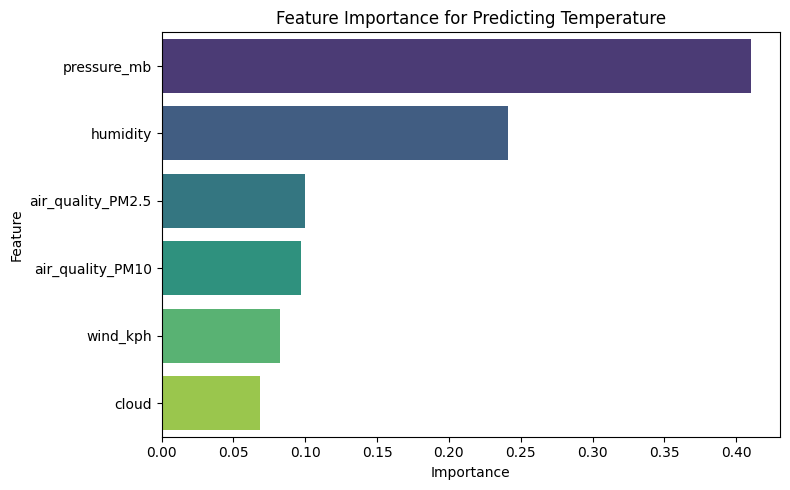

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select relevant features
features = ['humidity', 'wind_kph', 'pressure_mb', 'cloud', 'air_quality_PM2.5', 'air_quality_PM10']
target = 'temperature_celsius'

# Drop missing values
df_feat = df[features + [target]].dropna()

X = df_feat[features]
y = df_feat[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance for Predicting Temperature')
plt.tight_layout()
plt.show()

In [ ]:
# Group by country and location_name to get mean values
map_df = df.groupby(['country', 'location_name', 'latitude', 'longitude'], as_index=False)[
    ['temperature_celsius', 'air_quality_PM2.5']].mean()
import folium
from folium.plugins import MarkerCluster

# Create base map
world_map = folium.Map(location=[20, 0], zoom_start=2, tiles='CartoDB positron')
marker_cluster = MarkerCluster().add_to(world_map)

# Add markers
for i, row in map_df.iterrows():
    popup = f"{row['location_name']}, {row['country']}<br>Temperature: {row['temperature_celsius']:.1f}°C<br>PM2.5: {row['air_quality_PM2.5']:.1f}"
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='crimson',
        fill=True,
        fill_opacity=0.7,
        popup=popup
    ).add_to(marker_cluster)

# Display map
world_map

world_map.save("weather_map.html")

In [ ]:
import plotly.express as px

# Filter out rows with missing lat, lon, or temperature
df_geo = df.dropna(subset=['latitude', 'longitude', 'temperature_celsius']).copy()

# Offset temperature to avoid negative bubble sizes
df_geo['temp_for_size'] = df_geo['temperature_celsius'] + abs(df_geo['temperature_celsius'].min()) + 1

# Create geographical scatter plot
fig_temp = px.scatter_geo(
    df_geo,
    lat='latitude',
    lon='longitude',
    color='temperature_celsius',
    hover_name='location_name',
    size='temp_for_size',
    projection='natural earth',
    title='Global Temperature Patterns',
    color_continuous_scale='thermal'
)

fig_temp.show()

Output hidden; open in https://colab.research.google.com to view.